In [1]:
pwd

'/home/shared/fastai'

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, GradientBoostingRegressor,AdaBoostRegressor
from IPython.display import display
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

import pandas as pd
import numpy as np
# np.set_printoptions(threshold=np.inf)

In [3]:
train = pd.read_csv('data_train.csv', low_memory=False)

In [4]:
test=pd.read_csv('data_test.csv', low_memory=False)

In [5]:
train.head()


,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


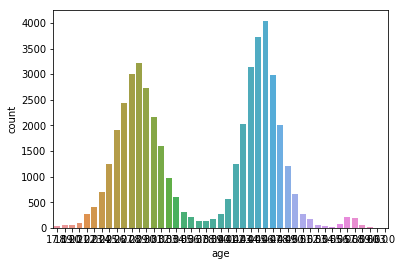

In [6]:
sns.countplot(train['age'])

In [7]:
train.program_duration.describe()

count    73147.000000
mean       128.208676
std          6.889679
min        117.000000
25%        121.000000
50%        131.000000
75%        134.000000
max        136.000000
Name: program_duration, dtype: float64

In [8]:
train.shape

(73147, 16)

In [9]:
train['age'].fillna(train['age'].median(), inplace=True)
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)
test['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)

In [37]:
# # X = train.iloc[:,1:15].values
# # y = train.iloc[:,15].values

# # X

# # # Encoding categorical data
# # from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# # labelencoder_X1 = LabelEncoder()
# # X[:, 0] = labelencoder_X1.fit_transform(X[:, 0])


# # labelencoder_X2 = LabelEncoder()
# # X[:, 1] = labelencoder_X2.fit_transform(X[:, 1])

# # labelencoder_X3 = LabelEncoder()
# # X[:, 4] = labelencoder_X3.fit_transform(X[:, 4])

# # labelencoder_X4 = LabelEncoder()
# # X[:, 5] = labelencoder_X4.fit_transform(X[:, 5])

# # labelencoder_X5 = LabelEncoder()
# # X[:, 7] = labelencoder_X5.fit_transform(X[:, 7])

# # labelencoder_X6 = LabelEncoder()
# # X[:, 8] = labelencoder_X6.fit_transform(X[:, 8])

# # labelencoder_X7 = LabelEncoder()
# # X[:, 12] = labelencoder_X7.fit_transform(X[:, 12])

# # X

# # onehotencoder = OneHotEncoder(categorical_features = [0,1,4,5,8,7,12])
# # X = onehotencoder.fit_transform(X).toarray()

# # X=X[:,1:]

# X

# X.shape

In [18]:
train.shape

(73147, 14)

In [28]:
X = train.iloc[:,:].values
y = Y

In [29]:
test=test.iloc[:,:].values

In [26]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [35]:
X_train.shape

(54860, 14)

In [48]:
clf=Sequential()

clf.add(Dense(8,activation='relu',input_dim=14))

clf.add(Dense(8,activation='relu'))

clf.add(Dense(8,activation='relu'))

clf.add(Dense(8,activation='relu'))


clf.add(Dense(1,activation='sigmoid'))

clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=[auc_roc])

clf.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
54860/54860 [==============================] - 11s 203us/step - loss: 0.5823 - auc: 0.6090
Epoch 2/100
54860/54860 [==============================] - 11s 197us/step - loss: 0.5680 - auc: 0.6683
Epoch 3/100
54860/54860 [==============================] - 11s 200us/step - loss: 0.5641 - auc: 0.6783
Epoch 4/100
54860/54860 [==============================] - 11s 198us/step - loss: 0.5614 - auc: 0.6847
Epoch 5/100
54860/54860 [==============================] - 11s 193us/step - loss: 0.5603 - auc: 0.6882
Epoch 6/100
54860/54860 [==============================] - 11s 191us/step - loss: 0.5592 - auc: 0.6913
Epoch 7/100
54860/54860 [==============================] - 11s 191us/step - loss: 0.5583 - auc: 0.6936
Epoch 8/100
54860/54860 [==============================] - 11s 195us/step - loss: 0.5577 - auc: 0.6953
Epoch 9/100
54860/54860 [==============================] - 11s 196us/step - loss: 0.5572 - auc: 0.6969
Epoch 10/100
54860/54860 [==============================] - 11s 193us/ste

KeyboardInterrupt: 

In [37]:
def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

In [39]:
import tensorflow as tf

In [40]:
auc_roc = as_keras_metric(tf.metrics.auc)


In [47]:
ypred=clf.predict(X_test)

In [48]:
ypred=(ypred>0.5)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)


In [50]:
cm

array([[ 1778,  3740],
       [ 1258, 11511]])

In [52]:
(1778+11511)/18287

0.7266910920325914

In [56]:
X

array([[ 0.,  0.,  0., ..., 24.,  5.,  1.],
       [ 0.,  1.,  0., ..., 26.,  2.,  3.],
       [ 0.,  0.,  0., ..., 40.,  1.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 39.,  3.,  4.],
       [ 0.,  0.,  0., ..., 27.,  2.,  2.],
       [ 0.,  0.,  0., ..., 31.,  2.,  4.]])

In [61]:
y_pred=clf.predict(Xt)

In [62]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [10]:
train.shape,test.shape

((73147, 16), (31349, 15))

In [11]:
train=train.drop(['id',], axis=1)
test=test.drop(['id',], axis=1)


In [ ]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
train['age'].fillna(train['age'].median(), inplace=True)
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)
test['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)

In [12]:
train.isna().any()

program_id                   False
program_type                 False
program_duration             False
test_id                      False
test_type                    False
difficulty_level             False
trainee_id                   False
gender                       False
education                    False
city_tier                    False
age                          False
total_programs_enrolled      False
is_handicapped               False
trainee_engagement_rating    False
is_pass                      False
dtype: bool

In [ ]:
test.isna().any()

In [ ]:
train.head()

In [13]:
train_cats(train)

In [14]:
train_cats(test)

In [15]:
train,Y,_,nas = proc_df(train,'is_pass',do_scale=True)

In [16]:
test, _,_,nas = proc_df(test,do_scale=True)

In [17]:
train.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,16,6,1.130877,1.149926,1,3,-0.079614,2,4,0.744533,-1.860209,1.947172,1,-1.051919
1,3,2,0.405149,-0.918823,1,1,1.171193,1,2,1.733085,-1.583475,-0.470608,1,0.457112
2,21,7,-1.191453,1.696388,2,1,0.726555,2,4,-1.232572,0.353665,-1.276534,1,-0.297404
3,4,2,-1.626890,-1.153021,1,1,0.581206,1,4,0.744533,0.215298,1.141245,1,-1.051919
4,11,4,0.405149,-0.138163,1,3,0.131133,1,2,-1.232572,0.630399,-0.470608,1,1.211627


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(train,Y,test_size=0.2)

In [ ]:
rfc = RandomForestRegressor(n_estimators=100,n_jobs=-1,min_samples_leaf=2, max_features=0.5,oob_score = True) 
rfc.fit(x_tr,y_tr)
rfc.score(x_te,y_te)

In [ ]:
yp=rfc.predict(x_te)

In [ ]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_te,yp)# rfc.score(x_te,y_te)

In [ ]:
y_pred=rfc.predict(test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(train,Y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = train.loc[train_index],train.loc[test_index]
     ytr,yvl = Y[train_index],Y[test_index]
    
     model = RandomForestRegressor(n_estimators=100,max_features=0.5,n_jobs=-1,oob_score=True,)
#      model=LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict(xvl)
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1
# Making predictions for the test data
pred=model.predict(tset)

In [ ]:
from sklearn import preprocessing 

train=train.apply(LabelEncoder().fit_transform)
test=test.apply(LabelEncoder().fit_transform)


In [ ]:
X_train = train.drop(["is_pass"], axis=1)
y_train = train["is_pass"].values

X_test = test

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dev_X, val_X, dev_y, val_y = train_test_split(train, Y, test_size = 0.2, random_state = 42)

In [ ]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
       "objective" : "regression",
        'boosting_type': 'gbdt',
        "metric" : "auc",
        "num_leaves" : 100,
        'max_depth':-1,
        "learning_rate" : 0.008,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1,
        "seed": 42,
        'min_data_in_leaf':1
        , 'min_sum_hessian_in_leaf':100
        , 'feature_fraction':.5
        , 'bagging_fraction': .5
        , 'bagging_freq' :4
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [ ]:
pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test)
print("LightGBM Training Completed...")

In [ ]:
print("Features Importance...")
gain = model.feature_importance('gain')
featureimp = pd.DataFrame({'feature':model.feature_name(), 
                   'split':model.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
print(featureimp[:15])

In [ ]:
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'reg:linear', 
          'eval_metric': 'auc',
          'eta': 0.006,
          'max_depth': 11, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
    
    tr_data = xgb.DMatrix(train_X, train_y)
    va_data = xgb.DMatrix(val_X, val_y)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 30, verbose_eval=50)
    
    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit)
    
    return xgb_pred_y, model_xgb

In [ ]:
pred_test_xgb, model_xgb = run_xgb(dev_X, dev_y, val_X, val_y, test)
print("XGB Training Completed...")

In [ ]:
cb_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.008,
                             depth=10,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 20,
                             od_wait=20)

In [ ]:
cb_model.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=True)

In [ ]:
pred_test_cat = cb_model.predict(X_test)


In [ ]:
sub_lgb = pd.DataFrame()
sub_lgb["is_pass"] = pred_test

sub_xgb = pd.DataFrame()
sub_xgb["is_pass"] = pred_test_xgb

sub_cat = pd.DataFrame()
# sub_cat["is_pass"] = pred_test_cat

sub_rf=pd.DataFrame()
sub_rf['is_pass']=y_pred

# subm["is_pass"] = (sub_cat['is_pass'])/1
subm["is_pass"] = (sub_lgb["is_pass"]+sub_xgb["is_pass"])/2

In [60]:
subm=pd.read_csv('data_sample.csv')

In [63]:
subm["is_pass"]=y_pred

In [64]:
subm.head()

,id,is_pass
0,1626_45,1.0
1,11020_130,1.0
2,12652_146,1.0
3,7038_72,1.0
4,888_71,1.0


In [65]:
subm.to_csv('sant.csv',sep=',',index=False)

In [ ]:
subm.head()

In [ ]:
subm.head()

In [ ]:
subm.head() # best acc 




#79.88
# 	id	        is_pass
# 0	1626_45 	0.794175
# 1	11020_130	1.008011
# 2	12652_146	0.678228
# 3	7038_72	    0.024426
# 4	888_71	    0.471334

#7.86
# 	id	        is_pass
# 0	1626_45	    0.815759
# 1	11020_130	1.011611
# 2	12652_146	0.663255
# 3	7038_72	    0.036727
# 4	888_71	    0.44577



# #79.75

# id	            is_pass
# 0	1626_45	    0.792987
# 1	11020_130	1.008313
# 2	12652_146	0.670118
# 3	7038_72	    0.040022
# 4	888_71	    0.440334



#79.68
# id	            is_pass
# 0	1626_45	    0.694920
# 1	11020_130	0.971394
# 2	12652_146	0.566008
# 3	7038_72	    0.151340
# 4	888_71	    0.513175




#79.0
# id	is_pass
# 0	1626_45 	0.769655
# 1	11020_130	0.975462
# 2	12652_146	0.661614
# 3	7038_72	    0.086556
# 4	888_71	    0.477911

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
y=subm['is_pass'].values

In [ ]:
for x,s in enumerate(y):
    if s>=0.80:
        y[x]=1.00
        print('ayee')
    elif s<0.20:
        y[x]=0.00
        print('liee')

In [ ]:
y

In [ ]:
subm['is_pass']=y

In [ ]:
from sklearn.grid_search import GridSearchCV
rfc = RandomForestRegressor(n_jobs=-1, max_features=0.5, max_depth=5,min_samples_leaf=4,min_samples_split=8,oob_score = True) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100],
           "max_depth" : [1, 3,5,],
           "min_samples_leaf" : [1, 2, 4,],
            "min_samples_split" : [2,4,8],



}

 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(dev_X, dev_y)
print(CV_rfc.best_params_)